## import the library

In [202]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [203]:
data=pd.read_csv('insurance.csv')

## Exploratory data analysis and data visualization
1. Missing value
2. Outlier treatement
3. Normalization and scaling
4. Encoding categorcical feature
5. Bivariate analysis

## Data Analysis
1. Shape
2. Info
3. Describe
4. Data types
5. Missing value

In [204]:
data.shape

(1338, 7)

In [205]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [206]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [207]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [208]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<AxesSubplot:xlabel='sex', ylabel='count'>

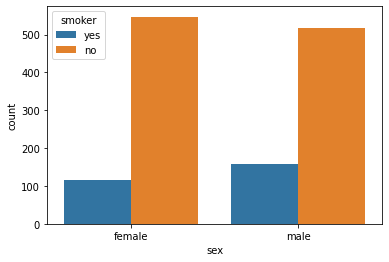

In [209]:
sns.countplot('sex', hue='smoker', data=data)

<AxesSubplot:xlabel='sex', ylabel='count'>

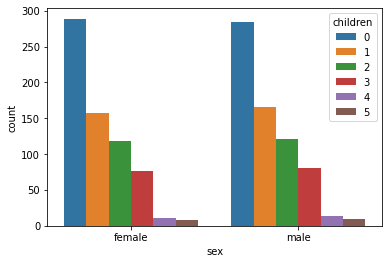

In [210]:
sns.countplot('sex', hue='children', data=data)

<AxesSubplot:xlabel='sex', ylabel='count'>

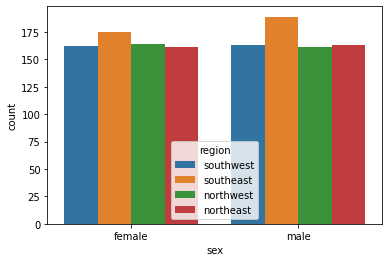

In [211]:
sns.countplot('sex', hue='region', data=data)

<AxesSubplot:xlabel='children', ylabel='count'>

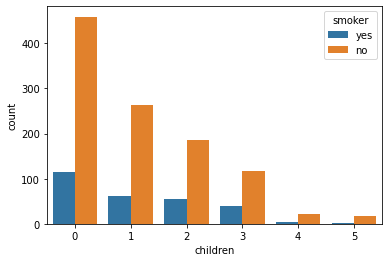

In [212]:
sns.countplot('children', hue='smoker', data=data)

In [213]:
#### Charges contain a lot of outlier 

<AxesSubplot:xlabel='children', ylabel='count'>

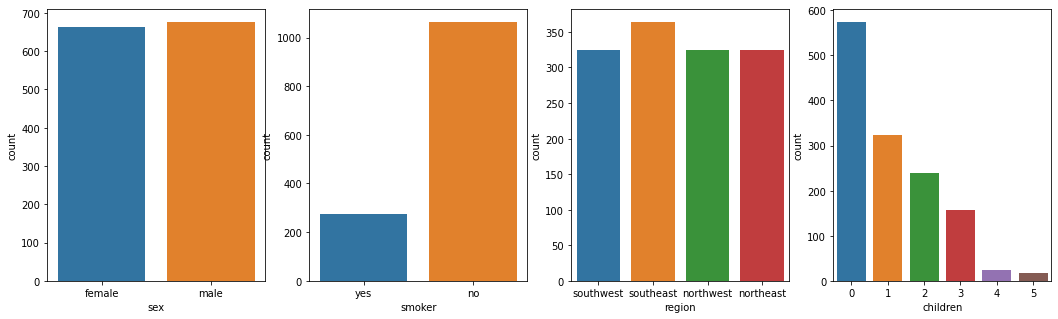

In [214]:
plt.figure(figsize=(18,5))
plt.subplot(1,4,1)
sns.countplot(data['sex'])
plt.subplot(1,4,2)
sns.countplot(data['smoker'])
plt.subplot(1,4,3)
sns.countplot(data['region'])
plt.subplot(1,4,4)
sns.countplot(data['children'])

<AxesSubplot:xlabel='charges'>

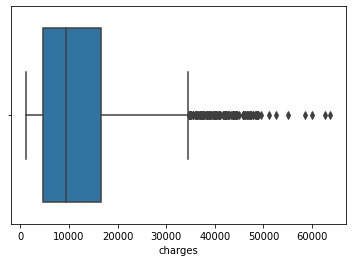

In [215]:
sns.boxplot(data['charges'])

<AxesSubplot:xlabel='bmi'>

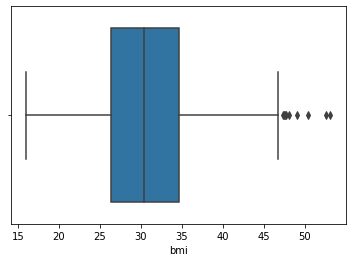

In [216]:
sns.boxplot(data['bmi'])

<AxesSubplot:xlabel='age'>

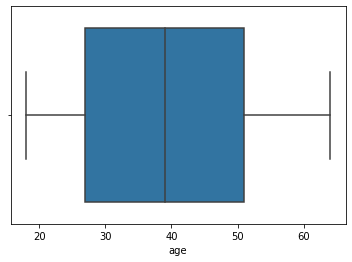

In [217]:
sns.boxplot(data['age'])

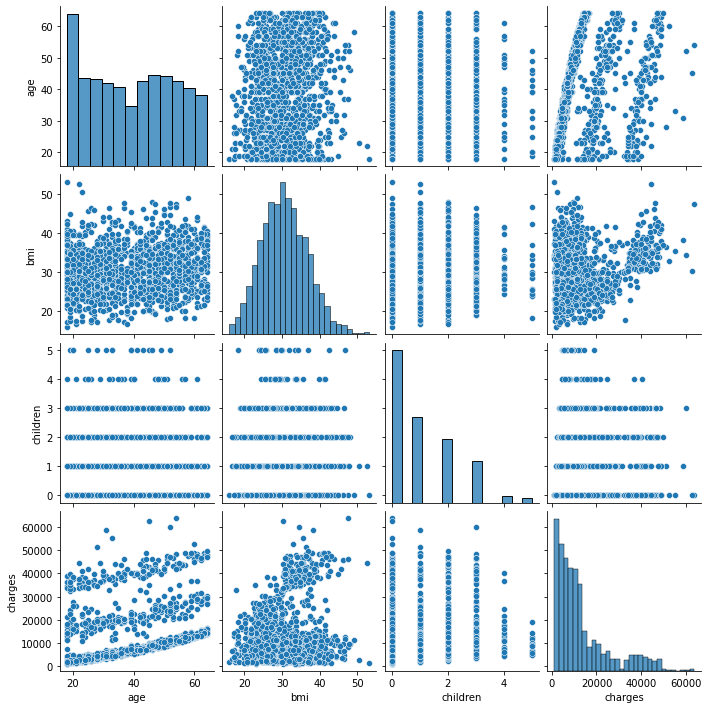

In [218]:
sns.pairplot(data)

## check the outlier

In [219]:
def outlier_threshold(data1, feature):
    q1=data1[feature].quantile(0.25)
    q3=data1[feature].quantile(0.75)
    IQR=q3-q1
    lower_limit, upper_limit=q1 - 1.5*IQR, q3+ 1.5*IQR
    return lower_limit, upper_limit


In [220]:
def has_outlier(data1, feature):
    lower_limit, upper_limit=outlier_threshold(data1, feature)
    if data1[(data1[feature]<lower_limit) | (data1[feature]>upper_limit)].any(axis=None):
        print(feature, 'YEs')
    else:
        print(feature, 'No')

In [221]:
def replace_with_outlier(data1, num_feature):
    for feature in num_feature:
        lower_limit, upper_limit=outlier_threshold(data1, feature)
        data.loc[(data[feature]<lower_limit), feature]=lower_limit
        data.loc[(data[feature]>upper_limit), feature]=upper_limit

In [222]:
for col in ['age', 'charges', 'bmi']:
    has_outlier(data, col)

age No
charges YEs
bmi YEs


In [223]:
replace_with_outlier(data, ['age', 'charges'])

In [224]:
for col in ['age', 'charges', 'bmi']:
    has_outlier(data, col)

age No
charges No
bmi YEs


<AxesSubplot:xlabel='charges'>

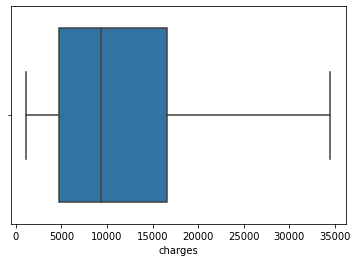

In [225]:
sns.boxplot(data['charges'])

<AxesSubplot:xlabel='age'>

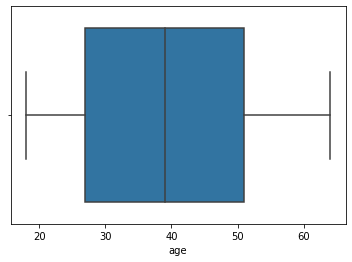

In [226]:
sns.boxplot(data['age'])

<AxesSubplot:>

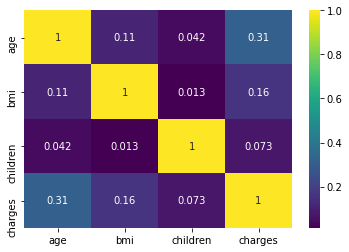

In [227]:
sns.heatmap(data.corr(), annot=True, cmap='viridis')

<AxesSubplot:xlabel='bmi', ylabel='Density'>

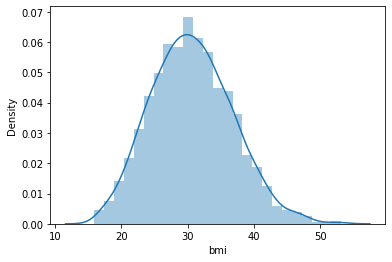

In [228]:
sns.distplot(data['bmi'])

In [229]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520


In [230]:
data.region.value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

## Encoding 

In [231]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data['region']=encoder.fit_transform(data['region'])

In [232]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0,yes,3,16884.92400
1,18.0,male,33.770,1,no,2,1725.55230
2,28.0,male,33.000,3,no,2,4449.46200
3,33.0,male,22.705,0,no,1,21984.47061
4,32.0,male,28.880,0,no,1,3866.85520


In [233]:
data=pd.get_dummies(data, drop_first=True)

In [234]:
data.head()

,age,bmi,children,region,charges,sex_male,smoker_yes
0,19.0,27.900,0,3,16884.92400,0,1
1,18.0,33.770,1,2,1725.55230,1,0
2,28.0,33.000,3,2,4449.46200,1,0
3,33.0,22.705,0,1,21984.47061,1,0
4,32.0,28.880,0,1,3866.85520,1,0


## Convert the data into  dependent and independent feature 

In [ ]:
X=data.drop('charges', axis=1)
y=data['charges']

## Split the data into train and test data

In [ ]:
from sklearn.model_selection import train_test_split
x_train ,x_test, y_train ,y_test=train_test_split(X, y, test_size=0.3, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

## Feature scaling
1. StandardScaler (mean=0, std=1)
2. MinMaxScaler (0 and 1)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scale=scaler.fit_transform(x_train)
x_test_scale=scaler.fit_transform(x_test)

## Apply the machine learning model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

In [ ]:
linear=LinearRegression()
linear.fit(x_train, y_train)
print('training set score : {}'.format(linear.score(x_train,y_train)))
print('testing set score :{}'.format(linear.score(x_test, y_test)))

In [ ]:
random=RandomForestRegressor(max_depth=5)
random.fit(x_train, y_train)
print('training set score : {}'.format(random.score(x_train,y_train)))
print('testing set score :{}'.format(random.score(x_test, y_test)))

In [ ]:
y_pred=random.predict(x_test_scale)
y_pred_df=pd.DataFrame(y_pred, columns=['Predicted values'])
y_test_df=pd.DataFrame(np.array(y_test), columns=['Reals values'])
pd.concat([y_test_df, y_pred_df], axis=1).head(10)

In [ ]:
boost=GradientBoostingRegressor(n_estimators=100,learning_rate=0.1, max_depth=3,alpha=0.5 )
boost.fit(x_train,y_train)
print(boost.score(x_train ,y_train))
print(boost.score(x_test, y_test))